In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('50_Startups (1).csv')
data.dropna(inplace = True)
data.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [5]:
data.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data_dummy=pd.get_dummies(data.STATE)

In [25]:
df=pd.concat([data_dummy,data],axis=1)
df1=df.drop(['STATE'],axis=1)
df1.head()

,California,Florida,New York,RND,ADMIN,MKT,PROFIT
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [8]:
import seaborn as sns

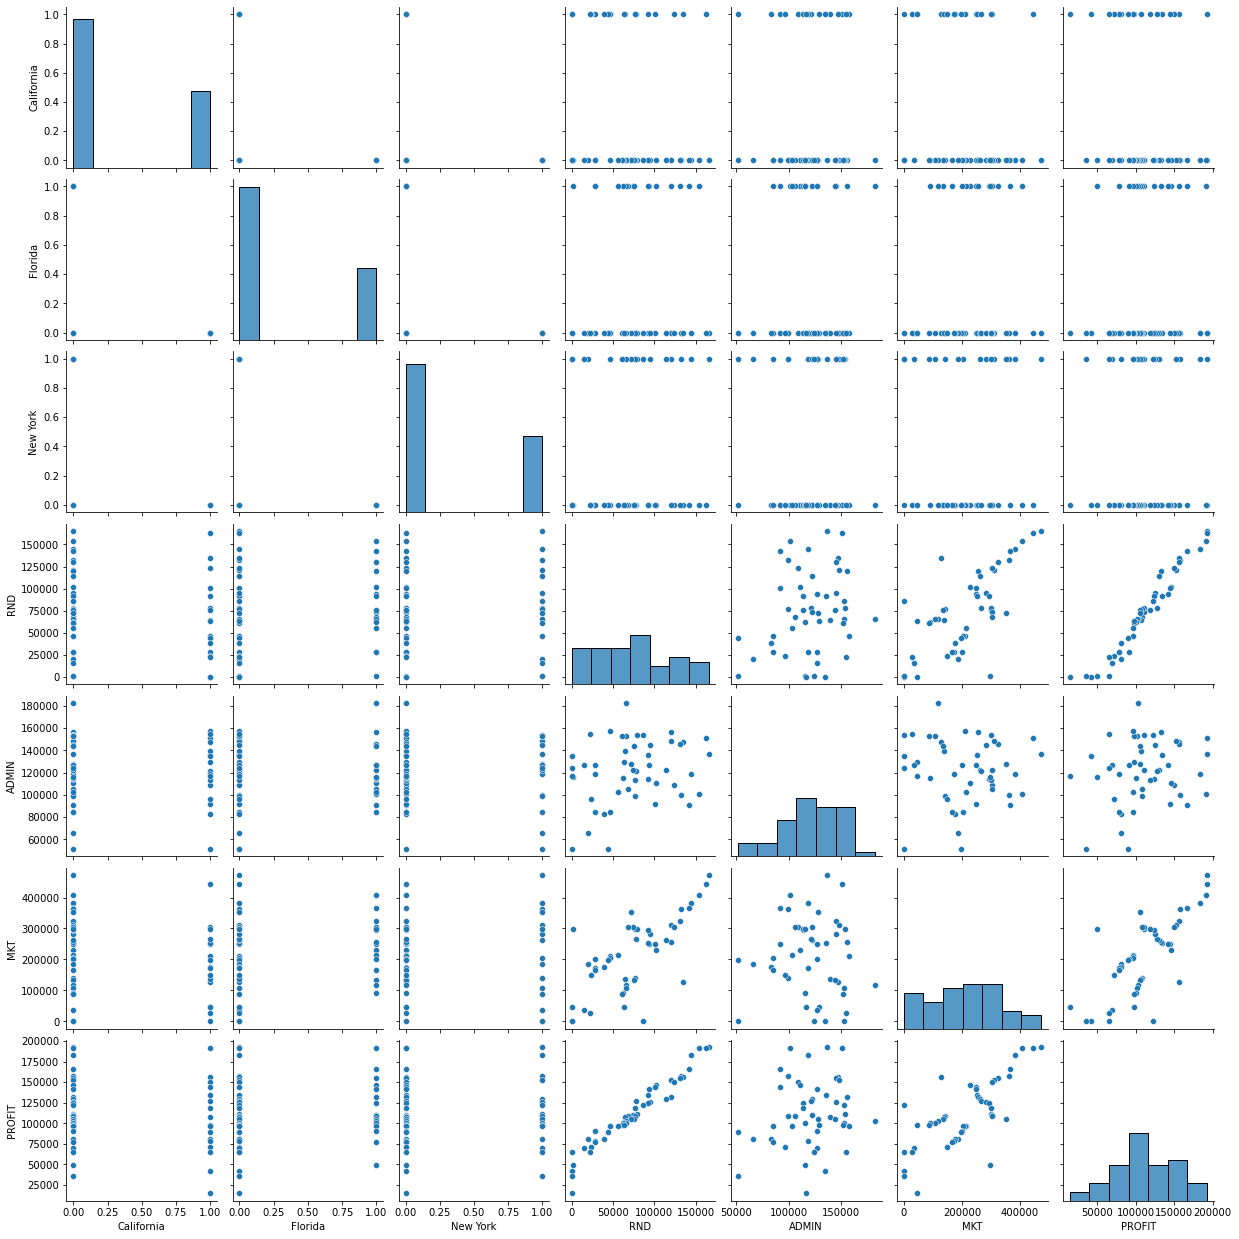

In [9]:
sns.pairplot(df1)

<AxesSubplot:>

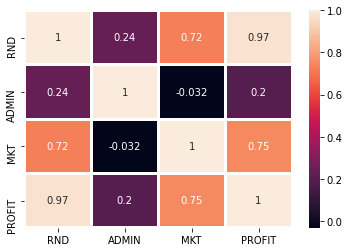

In [10]:
sns.heatmap(data.corr(),annot=True,linewidth=2)

<AxesSubplot:>

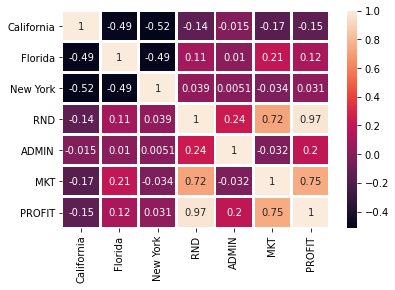

In [11]:
sns.heatmap(df1.corr(),annot=True,linewidth=2)

In [26]:
x=df1.iloc[:,0:5]
y=df1.iloc[:,5]
x.head()

,California,Florida,New York,RND,ADMIN
0,0,0,1,165349.20,136897.80
1,1,0,0,162597.70,151377.59
2,0,1,0,153441.51,101145.55
3,0,0,1,144372.41,118671.85
4,0,1,0,142107.34,91391.77


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [14]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [15]:
reg=model.fit(X_train,Y_train)

In [16]:
reg.predict(X_test)

array([281409.35995669, 134540.40865784,  59025.88301002, 271742.36091223,
       171156.48906015, 161892.66017235, 219603.14600589, 234996.05796581,
       338841.30682814, 175888.52819416])

In [17]:
x1=df1.iloc[:,3].values
y1=df1.iloc[:,5].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [19]:
Y_train.shape

(40,)

In [20]:
from sklearn import linear_model
model1=linear_model.LinearRegression()

In [21]:
import numpy as np
reg=model1.fit(np.array(X_train).reshape(-1,1),Y_train)

In [22]:
reg.predict(np.array(X_test).reshape(-1,1))

array([261350.60205939, 165709.98436164, 207657.72701379,  98484.89984849,
       266120.23976533,  97664.80933257, 231524.78095453, 212437.13750382,
       210189.30766748, 251376.11557557])

In [23]:
import matplotlib.pyplot as plt


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

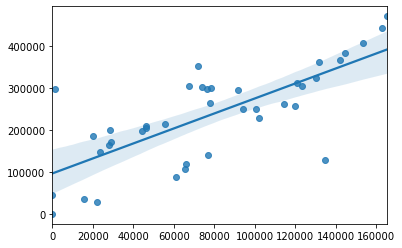

In [24]:
import seaborn as sns
sns.regplot(X_train,Y_train)